# SHOPPER SENTIMENTS

In [3]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
df=pd.read_csv('/content/TeePublic_review.csv',encoding='ISO-8859-1')
df.drop(['reviewer_id'],axis=1,inplace=True)
df

,store_location,latitude,longitude,date,month,year,title,review,review-label
0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5
1,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4
...,...,...,...,...,...,...,...,...,...
278095,US,37.090240,-95.712891,2018,4,2027 00:00:00,Highly recommend!,"Delivery is quick, arrives when promised. Shir...",5
278096,HR,45.100000,15.200000,2018,4,2027 00:00:00,Great quality,"Great quality, fast delivery, would recommend!",5
278097,US,37.090240,-95.712891,2018,4,2027 00:00:00,Dudes rock.,Dudes rock. Seriously.,5
278098,US,37.090240,-95.712891,2018,4,2027 00:00:00,Shipping was fast the T-shirt was justï¿½ï¿½ï¿½,Shipping was fast the T-shirt was just right g...,5


In [ ]:
df.head()

,store_location,latitude,longitude,date,month,year,title,review,review-label
0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5
1,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4


In [ ]:
df.tail()

,store_location,latitude,longitude,date,month,year,title,review,review-label
278095,US,37.09024,-95.712891,2018,4,2027 00:00:00,Highly recommend!,"Delivery is quick, arrives when promised. Shir...",5
278096,HR,45.10000,15.200000,2018,4,2027 00:00:00,Great quality,"Great quality, fast delivery, would recommend!",5
278097,US,37.09024,-95.712891,2018,4,2027 00:00:00,Dudes rock.,Dudes rock. Seriously.,5
278098,US,37.09024,-95.712891,2018,4,2027 00:00:00,Shipping was fast the T-shirt was justï¿½ï¿½ï¿½,Shipping was fast the T-shirt was just right g...,5
278099,US,37.09024,-95.712891,2018,4,2027 00:00:00,Not great quality,Print of t shirt was blurry and appeared faded...,2


In [ ]:
df.columns

Index(['store_location', 'latitude', 'longitude', 'date', 'month', 'year',
       'title', 'review', 'review-label'],
      dtype='object')

In [ ]:
df.dtypes

store_location     object
latitude          float64
longitude         float64
date                int64
month               int64
year               object
title              object
review             object
review-label        int64
dtype: object

In [4]:
df.isna().sum()

store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  0
title                 9
review            30503
review-label          0
dtype: int64

In [5]:
df=df.dropna(axis=0)
df.isna().sum()

store_location    0
latitude          0
longitude         0
date              0
month             0
year              0
title             0
review            0
review-label      0
dtype: int64

In [6]:
df['review-label'].unique()

array([5, 4, 3, 1, 2])

In [ ]:
target_count=df['review-label'].value_counts()
target_count

5    181428
4     22944
1     16746
3     15743
2     10730
Name: review-label, dtype: int64

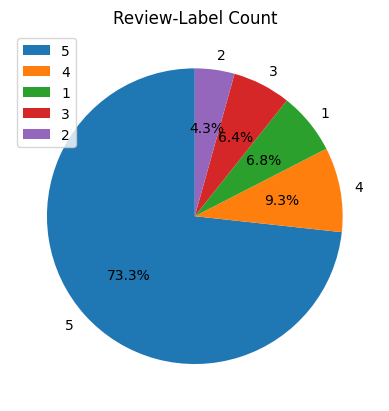

In [ ]:
plt.pie(target_count,labels=target_count.index,autopct='%1.1f%%',startangle=90)
plt.title('Review-Label Count')
plt.legend()

So we can see the dataset is imbalanced

In [7]:
df.drop(['store_location','latitude','longitude','date','month','year'],axis=1,inplace=True)

<ipython-input-7-ef5dd8eed842>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['store_location','latitude','longitude','date','month','year'],axis=1,inplace=True)


In [8]:
df['review-label']=df['review-label'].map({1:0,2:1,3:2,4:3,5:4}).astype(int)
df

<ipython-input-8-a90fe47634ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review-label']=df['review-label'].map({1:0,2:1,3:2,4:3,5:4}).astype(int)


,title,review,review-label
0,Great help with lost order,I had an order that was lost in transit. When ...,4
1,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,4
2,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,4
3,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,4
4,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,3
...,...,...,...
278095,Highly recommend!,"Delivery is quick, arrives when promised. Shir...",4
278096,Great quality,"Great quality, fast delivery, would recommend!",4
278097,Dudes rock.,Dudes rock. Seriously.,4
278098,Shipping was fast the T-shirt was justï¿½ï¿½ï¿½,Shipping was fast the T-shirt was just right g...,4


Downloading required packages

In [9]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
df['review']=df['title']+' '+df['review']

<ipython-input-10-161aefbe2057>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['title']+' '+df['review']


Tokenization

In [11]:
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
df['tokenized_review']=df['review'].apply(tk.tokenize)
df['tokenized_review']=df['tokenized_review'].apply(lambda tokens:' '.join(tokens))

<ipython-input-11-4edac08db7d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_review']=df['review'].apply(tk.tokenize)
<ipython-input-11-4edac08db7d9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_review']=df['tokenized_review'].apply(lambda tokens:' '.join(tokens))


In [12]:
reviews=df.review
reviews

0         Great help with lost order I had an order that...
1         I ordered the wrong size tee and hadï¿½ï¿½ï¿½ ...
2         These guys offer the best customerï¿½ï¿½ï¿½ Th...
3         Good Stuff Looked for an obscure phrase on a s...
4         My order arrived in a good timelyï¿½ï¿½ï¿½ My ...
                                ...                        
278095    Highly recommend! Delivery is quick, arrives w...
278096    Great quality Great quality, fast delivery, wo...
278097                   Dudes rock. Dudes rock. Seriously.
278098    Shipping was fast the T-shirt was justï¿½ï¿½ï¿...
278099    Not great quality Print of t shirt was blurry ...
Name: review, Length: 247591, dtype: object

Removing special characters

In [13]:
reviews=reviews.str.replace('[^a-zA-Z0-9]+',' ')
reviews

<ipython-input-13-ffcaf1cb8b5f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews=reviews.str.replace('[^a-zA-Z0-9]+',' ')


0         Great help with lost order I had an order that...
1         I ordered the wrong size tee and had I ordered...
2         These guys offer the best customer These guys ...
3         Good Stuff Looked for an obscure phrase on a s...
4         My order arrived in a good timely My order arr...
                                ...                        
278095    Highly recommend Delivery is quick arrives whe...
278096    Great quality Great quality fast delivery woul...
278097                     Dudes rock Dudes rock Seriously 
278098    Shipping was fast the T shirt was just Shippin...
278099    Not great quality Print of t shirt was blurry ...
Name: review, Length: 247591, dtype: object

Removing non meaningful words

In [14]:
from nltk.tokenize import word_tokenize
reviews=reviews.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
reviews

0         Great help with lost order had order that was ...
1         ordered the wrong size tee and had ordered the...
2         These guys offer the best customer These guys ...
3         Good Stuff Looked for obscure phrase shirt Tee...
4         order arrived good timely order arrived good t...
                                ...                        
278095    Highly recommend Delivery quick arrives when p...
278096    Great quality Great quality fast delivery woul...
278097                      Dudes rock Dudes rock Seriously
278098    Shipping was fast the shirt was just Shipping ...
278099    Not great quality Print shirt was blurry and a...
Name: review, Length: 247591, dtype: object

Stemming - SnowballStemmer

In [15]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
reviews=reviews.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
reviews

0         great help with lost order had order that was ...
1         order the wrong size tee and had order the wro...
2         these guy offer the best custom these guy offe...
3         good stuff look for obscur phrase shirt teepub...
4         order arriv good time order arriv good time fa...
                                ...                        
278095    high recommend deliveri quick arriv when promi...
278096    great qualiti great qualiti fast deliveri woul...
278097                          dude rock dude rock serious
278098    ship was fast the shirt was just ship was fast...
278099    not great qualiti print shirt was blurri and a...
Name: review, Length: 247591, dtype: object

Removing stopwords

In [16]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
reviews=reviews.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
reviews

0         great help lost order order lost transit call ...
1         order wrong size tee order wrong size tee diff...
2         guy offer best custom guy offer best custom se...
3         good stuff look obscur phrase shirt teepubl pr...
4         order arriv good time order arriv good time fa...
                                ...                        
278095    high recommend deliveri quick arriv promis shi...
278096    great qualiti great qualiti fast deliveri woul...
278097                          dude rock dude rock serious
278098    ship fast shirt ship fast shirt right good com...
278099    great qualiti print shirt blurri appear fade t...
Name: review, Length: 247591, dtype: object

Vectorization

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(reviews)

In [18]:
train_data.shape

(247591, 39162)

In [19]:
print(train_data)

  (0, 27565)	0.13555386091146468
  (0, 4232)	0.21245068931764283
  (0, 28452)	0.1716572772691851
  (0, 25372)	0.18656326745674798
  (0, 22711)	0.3492643407698443
  (0, 14748)	0.1438170736646203
  (0, 28084)	0.2680859714494794
  (0, 29743)	0.1127940404320551
  (0, 8981)	0.12492698706143845
  (0, 6451)	0.2558685911845966
  (0, 35167)	0.30140770135738965
  (0, 23855)	0.3341634876332113
  (0, 20063)	0.4666713798668536
  (0, 15987)	0.369584928801307
  (0, 15003)	0.08362860994493179
  (1, 11968)	0.13240727882374415
  (1, 25816)	0.3217884252175562
  (1, 16138)	0.15114767858820005
  (1, 30236)	0.05852614935948433
  (1, 29671)	0.15162833275164025
  (1, 17742)	0.15290902948762744
  (1, 28173)	0.21191789395375005
  (1, 16994)	0.18525764097637704
  (1, 2704)	0.20045542677199762
  (1, 28197)	0.19620602396751183
  :	:
  (247589, 12599)	0.38212140116822285
  (247589, 30120)	0.34347544837229926
  (247589, 14635)	0.16453178120082101
  (247589, 30236)	0.1889265787061492
  (247589, 28452)	0.2504068923223

In [20]:
y=df['review-label']
y

0         4
1         4
2         4
3         4
4         3
         ..
278095    4
278096    4
278097    4
278098    4
278099    1
Name: review-label, Length: 247591, dtype: int64

In [21]:
x=train_data
x

<247591x39162 sparse matrix of type '<class 'numpy.float64'>'
	with 3170429 stored elements in Compressed Sparse Row format>

Splitting to train and test data

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Model Creation

XGBoost

In [31]:
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
y_pred

array([4, 4, 4, ..., 4, 4, 4])

Performance Evaluation of XGBoost

Confusion Matrix :
[[ 3066   353   316    49  1155]
 [ 1073   447   617   163   909]
 [  648   322  1206   678  1871]
 [  168    71   481  1811  4366]
 [  214    38   174   731 53351]]
Accuracy score : 0.8061741026952799
              precision    recall  f1-score   support

           0       0.59      0.62      0.61      4939
           1       0.36      0.14      0.20      3209
           2       0.43      0.26      0.32      4725
           3       0.53      0.26      0.35      6897
           4       0.87      0.98      0.92     54508

    accuracy                           0.81     74278
   macro avg       0.56      0.45      0.48     74278
weighted avg       0.77      0.81      0.78     74278



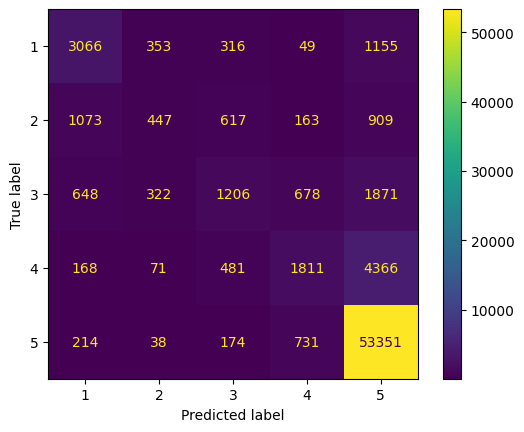

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
label=[1,2,3,4,5]
mat=confusion_matrix(y_test,y_pred)
dis=ConfusionMatrixDisplay(mat,display_labels=label)
dis.plot()
print('Confusion Matrix :')
print(mat)
print('Accuracy score :',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([4, 4, 4, ..., 4, 4, 4])

Performance Evaluation of Decision Tree

Confusion Matrix: 
[[ 2225   811   671   303   929]
 [  881   620   635   333   740]
 [  742   629   987   787  1580]
 [  331   338   836  1598  3794]
 [  842   532  1200  3133 48801]]
Accuracy score is 0.7301085112684779


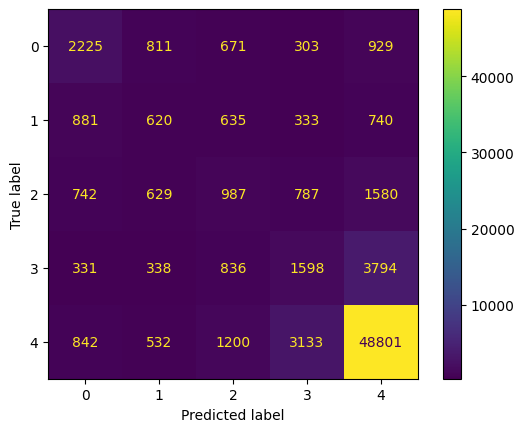

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
label=[0,1,2,3,4]
mat=confusion_matrix(y_test,y_pred)
dis=ConfusionMatrixDisplay(mat,display_labels=label)
dis.plot()
print('Confusion Matrix: ')
print(mat)
print('Accuracy score is',accuracy_score(y_test,y_pred))

Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42,class_weight='balanced',n_estimators=10,criterion='entropy')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
y_pred

array([0, 4, 4, ..., 3, 4, 4])

Performance Valuation of Random Forest

Confusion Matrix: 
[[ 2350   377   326   116  1770]
 [  930   321   364   154  1440]
 [  722   300   614   465  2624]
 [  225   110   393   874  5295]
 [  263    77   182   634 53352]]
Accuracy score : 0.7742669431056302


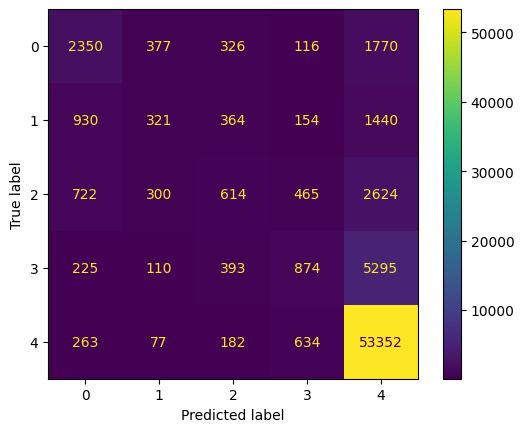

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay
label=[0,1,2,3,4]
mat=confusion_matrix(y_test,y_pred)
dis=ConfusionMatrixDisplay(mat,display_labels=label)
dis.plot()
print('Confusion Matrix: ')
print(mat)
print("Accuracy score :",accuracy_score(y_test,y_pred))

**THE BEST PERFORMANCE WAS ACHIEVED USING XGBoost**